### Lab1 part 2
Thanya Nguyen CS425
9/5/23

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy as en
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
pop_df = pd.read_csv("Life-Expectancy-Data.csv")
print(pop_df)

          Country  Year      Status  Life_expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  Alcohol  percentage expenditure  Hepatitis_B  Measles  \
0                62     0.01               71

In [3]:
features = ["Hepatitis_B", "Polio","Measles", "BMI", "Diphtheria", "HIV/AIDS", "Adult_Mortality"]
pop_df = pop_df.dropna() #drops all the NaN valuesafter reading in the data
X = np.array(pop_df[features])
y = np.array(pop_df["Status"])
print(np.shape(X))
print(np.shape(y))
print(X)
print(y)

(1649, 7)
(1649,)
[[6.500e+01 6.000e+00 1.154e+03 ... 6.500e+01 1.000e-01 2.630e+02]
 [6.200e+01 5.800e+01 4.920e+02 ... 6.200e+01 1.000e-01 2.710e+02]
 [6.400e+01 6.200e+01 4.300e+02 ... 6.400e+01 1.000e-01 2.680e+02]
 ...
 [7.300e+01 7.300e+01 3.040e+02 ... 7.100e+01 3.980e+01 7.300e+01]
 [7.600e+01 7.600e+01 5.290e+02 ... 7.500e+01 4.210e+01 6.860e+02]
 [7.900e+01 7.800e+01 1.483e+03 ... 7.800e+01 4.350e+01 6.650e+02]]
['Developing' 'Developing' 'Developing' ... 'Developing' 'Developing'
 'Developing']


### 2.1
Create a decision tree classifier with the entropy criterion and fit
to the training data. What is the accuracy score of this classifier on the testing set? What
is the first decision that is used to split the data (which feature does it use and what value
does it split on)?

162
701


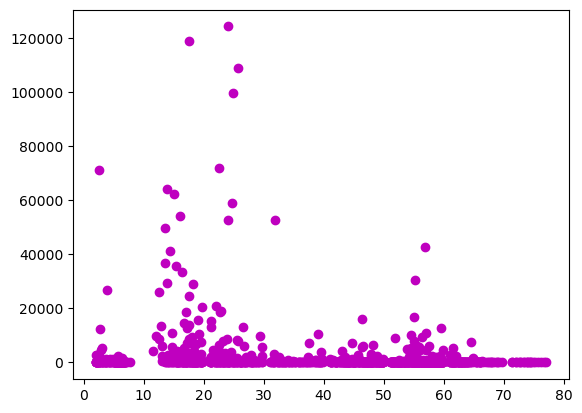

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)
plt.scatter(X_train[:,3], X_train[:,2], c= "m")
print(np.sum(y_train == 'Developed'))
print(np.sum(X_train[:,3] < 50))
#print(len(y == "Developing"))
#a = np.sum(y = "Developing")
#print(a)


In [5]:
#entropy formula found online
def entropy(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0
    value, counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)
    if n_classes <= 1:
        return 0
    ent = 0.
    for i in probs:
        ent -= i * np.log2(i)
    return ent


less50BMI = y_train[X_train[:,3] < 50]
greaterBMI50 = y_train[X_train[:,3] >= 50]
H_T = entropy(y_train)
HlessBMI50 = entropy(less50BMI)
HgreaterBMI50 = entropy(greaterBMI50)
print(HlessBMI50)
print(HgreaterBMI50)
weighted_H = ((len(less50BMI) / len(y_train)) * HlessBMI50) + ((len(greaterBMI50) / len(y_train)) * HgreaterBMI50)
IG = H_T - weighted_H
print("information gain:", IG) # i hope this is correct lol


0.1941771925669839
0.9339572019993274
information gain: 0.1373957556932635


### 2.2

1.0
0.9009174311926605
|--- feature_3 <= 52.85
|   |--- feature_6 <= 92.50
|   |   |--- feature_5 <= 0.15
|   |   |   |--- feature_3 <= 9.90
|   |   |   |   |--- feature_0 <= 93.50
|   |   |   |   |   |--- feature_0 <= 90.00
|   |   |   |   |   |   |--- feature_4 <= 94.50
|   |   |   |   |   |   |   |--- feature_3 <= 5.80
|   |   |   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |   |   |--- feature_3 >  5.80
|   |   |   |   |   |   |   |   |--- class: Developing
|   |   |   |   |   |   |--- feature_4 >  94.50
|   |   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |--- feature_0 >  90.00
|   |   |   |   |   |   |--- class: Developing
|   |   |   |   |--- feature_0 >  93.50
|   |   |   |   |   |--- feature_0 <= 97.50
|   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |--- feature_0 >  97.50
|   |   |   |   |   |   |--- feature_2 <= 8.00
|   |   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |   |--- feature_2 >  8.00
|   |   |

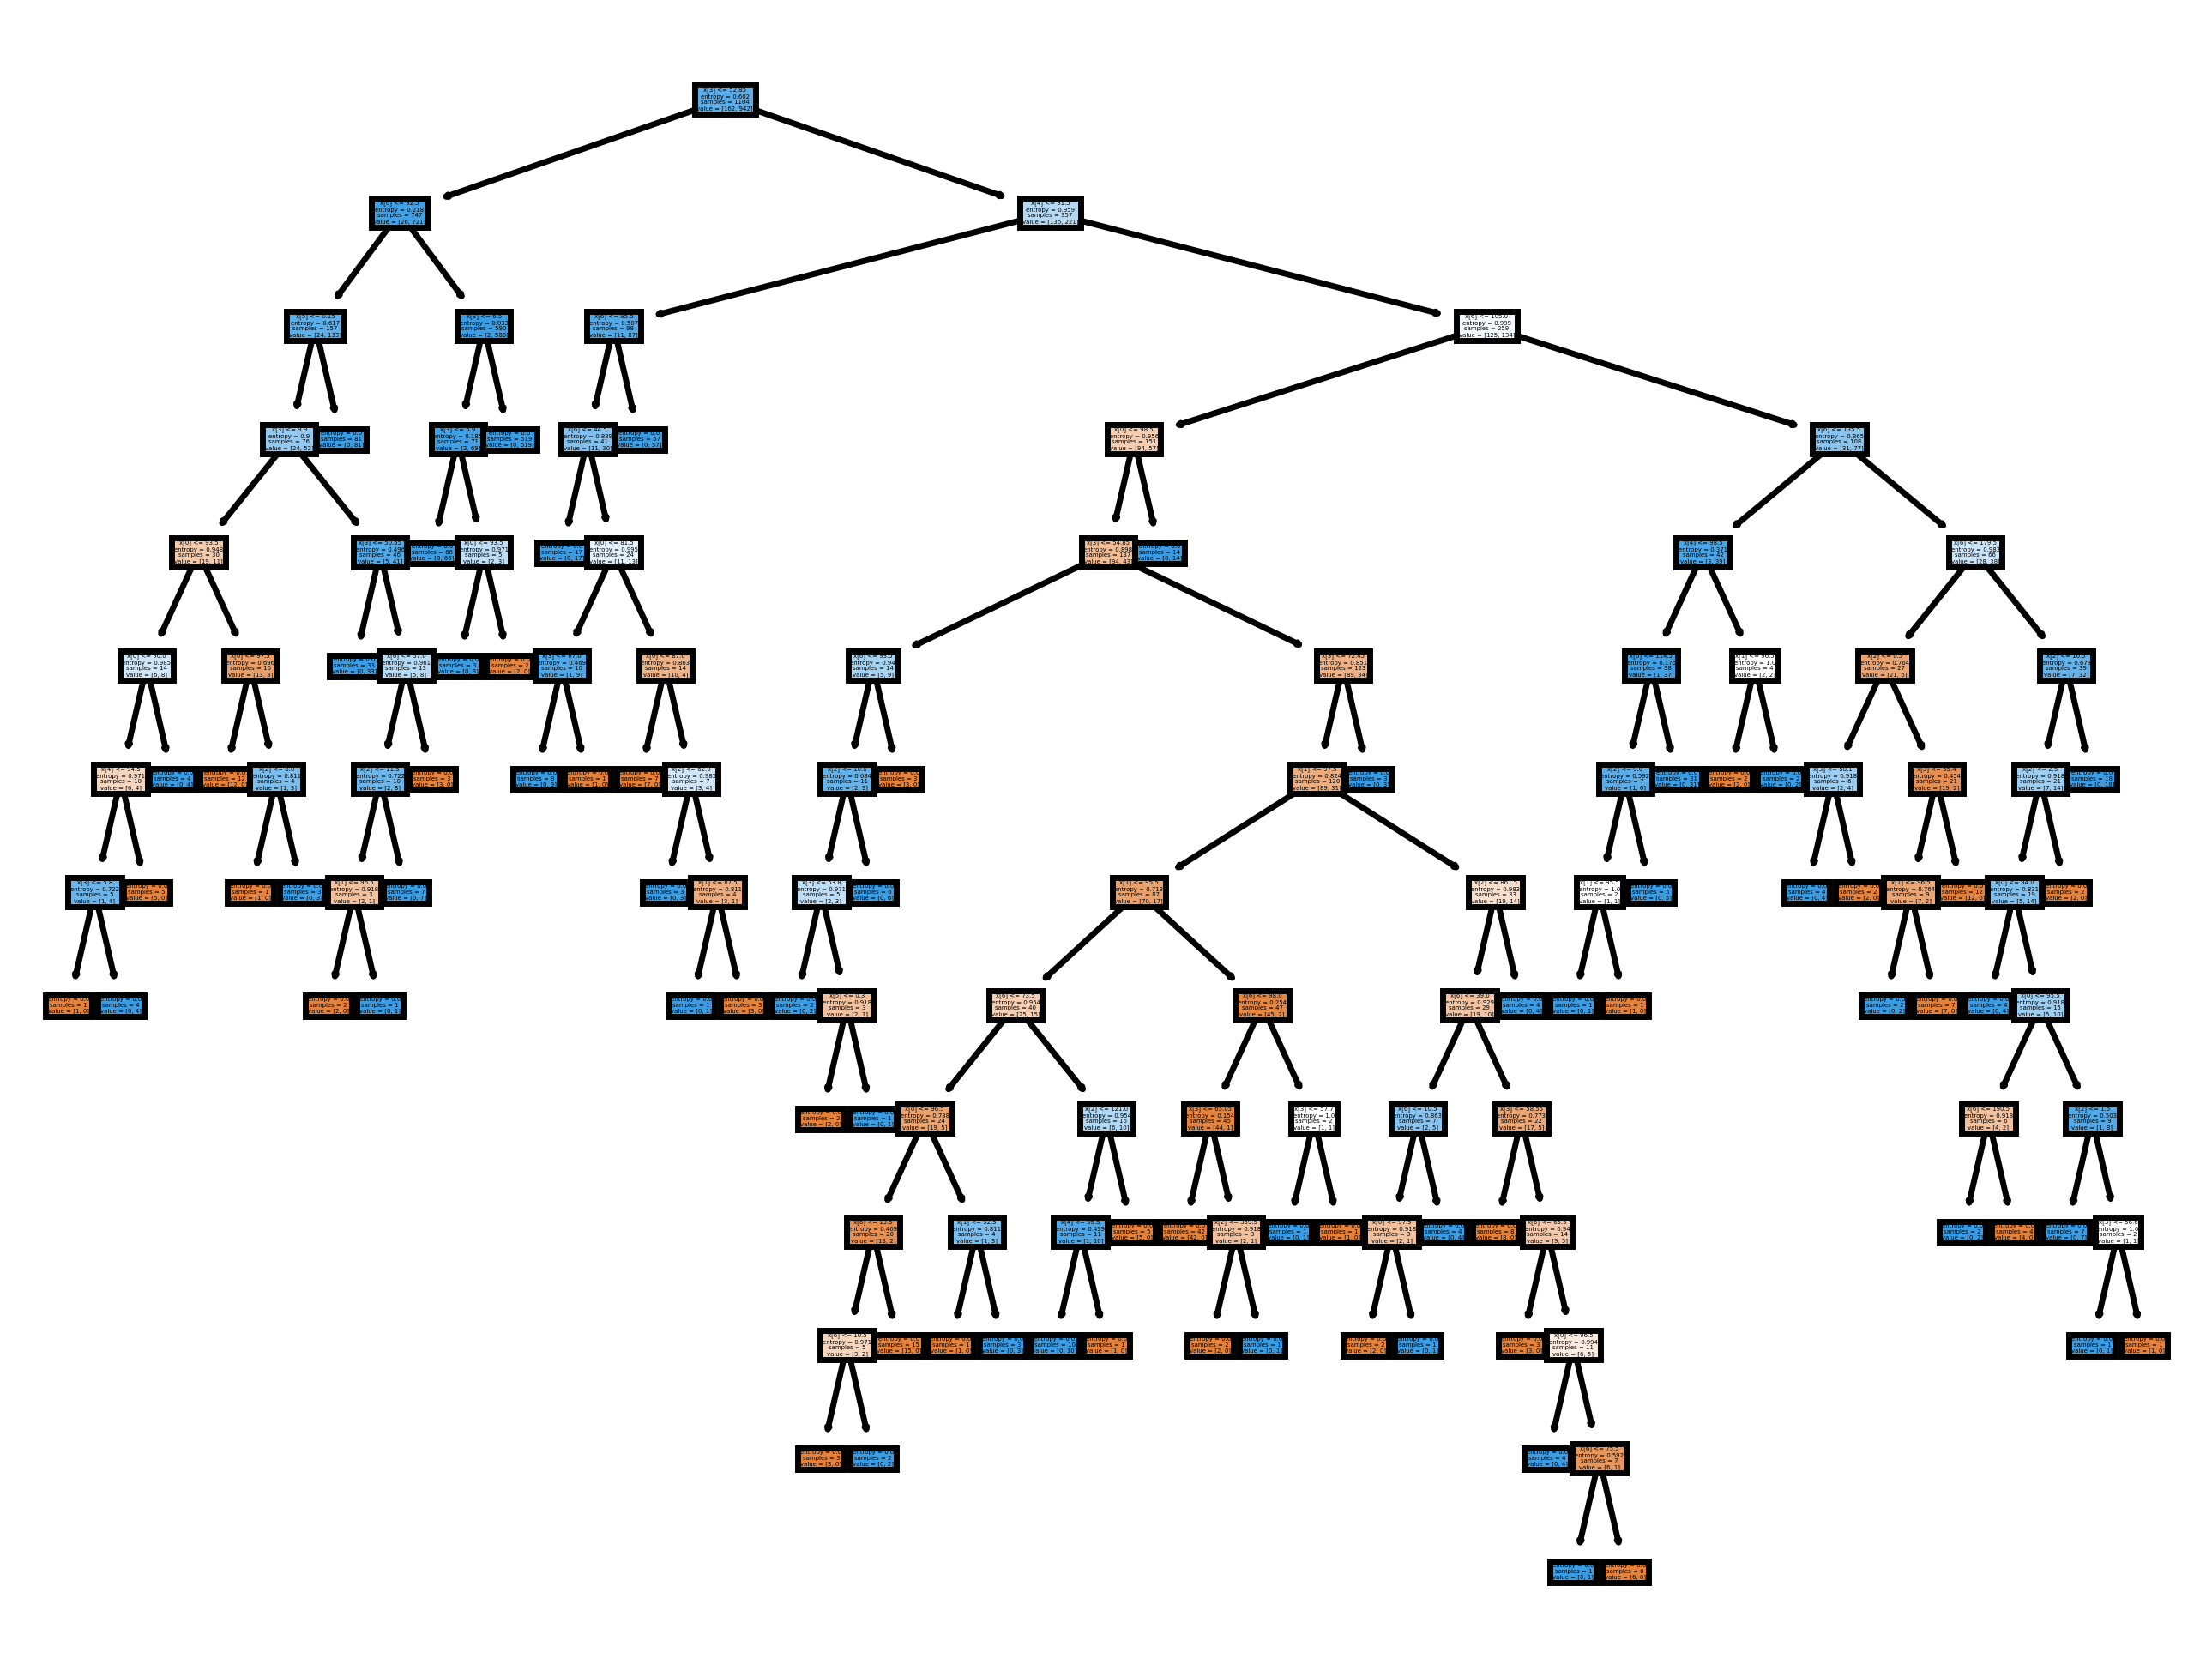

In [6]:
#copy and paste previous code to find accuaracy score
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train,y_predict))
y_predict = clf.predict(X_test)
print(accuracy_score(y_test,y_predict))
plt.figure(dpi=500)
tree.plot_tree(clf,filled=True)
print(tree.export_text(clf))

### 2.3
Create decision trees with max depths from 2 to 20 and calculate
the training and testing accuracy for each decision tree and display in a table. Which one is
best? Provide a short (1-2 sentence) explanation for why that depth is the best performing.

|--- feature_3 <= 52.85
|   |--- feature_6 <= 92.50
|   |   |--- class: Developing
|   |--- feature_6 >  92.50
|   |   |--- class: Developing
|--- feature_3 >  52.85
|   |--- feature_4 <= 91.50
|   |   |--- class: Developing
|   |--- feature_4 >  91.50
|   |   |--- class: Developing

train score  2 :  0.8532608695652174
test score 2 :  0.8532110091743119
[[  0  80]
 [  0 465]]
train score  3 :  0.8867753623188406
test score 3 :  0.8642201834862385
[[ 42  38]
 [ 36 429]]
train score  4 :  0.9067028985507246
test score 4 :  0.8642201834862385
[[ 46  34]
 [ 40 425]]
train score  5 :  0.9329710144927537
test score 5 :  0.8788990825688073
[[ 55  25]
 [ 41 424]]
train score  6 :  0.9501811594202898
test score 6 :  0.8788990825688073
[[ 53  27]
 [ 39 426]]
train score  7 :  0.9601449275362319
test score 7 :  0.8788990825688073
[[ 57  23]
 [ 43 422]]
train score  8 :  0.9682971014492754
test score 8 :  0.8788990825688073
[[ 57  23]
 [ 43 422]]
train score  9 :  0.9791666666666666
test score 9 

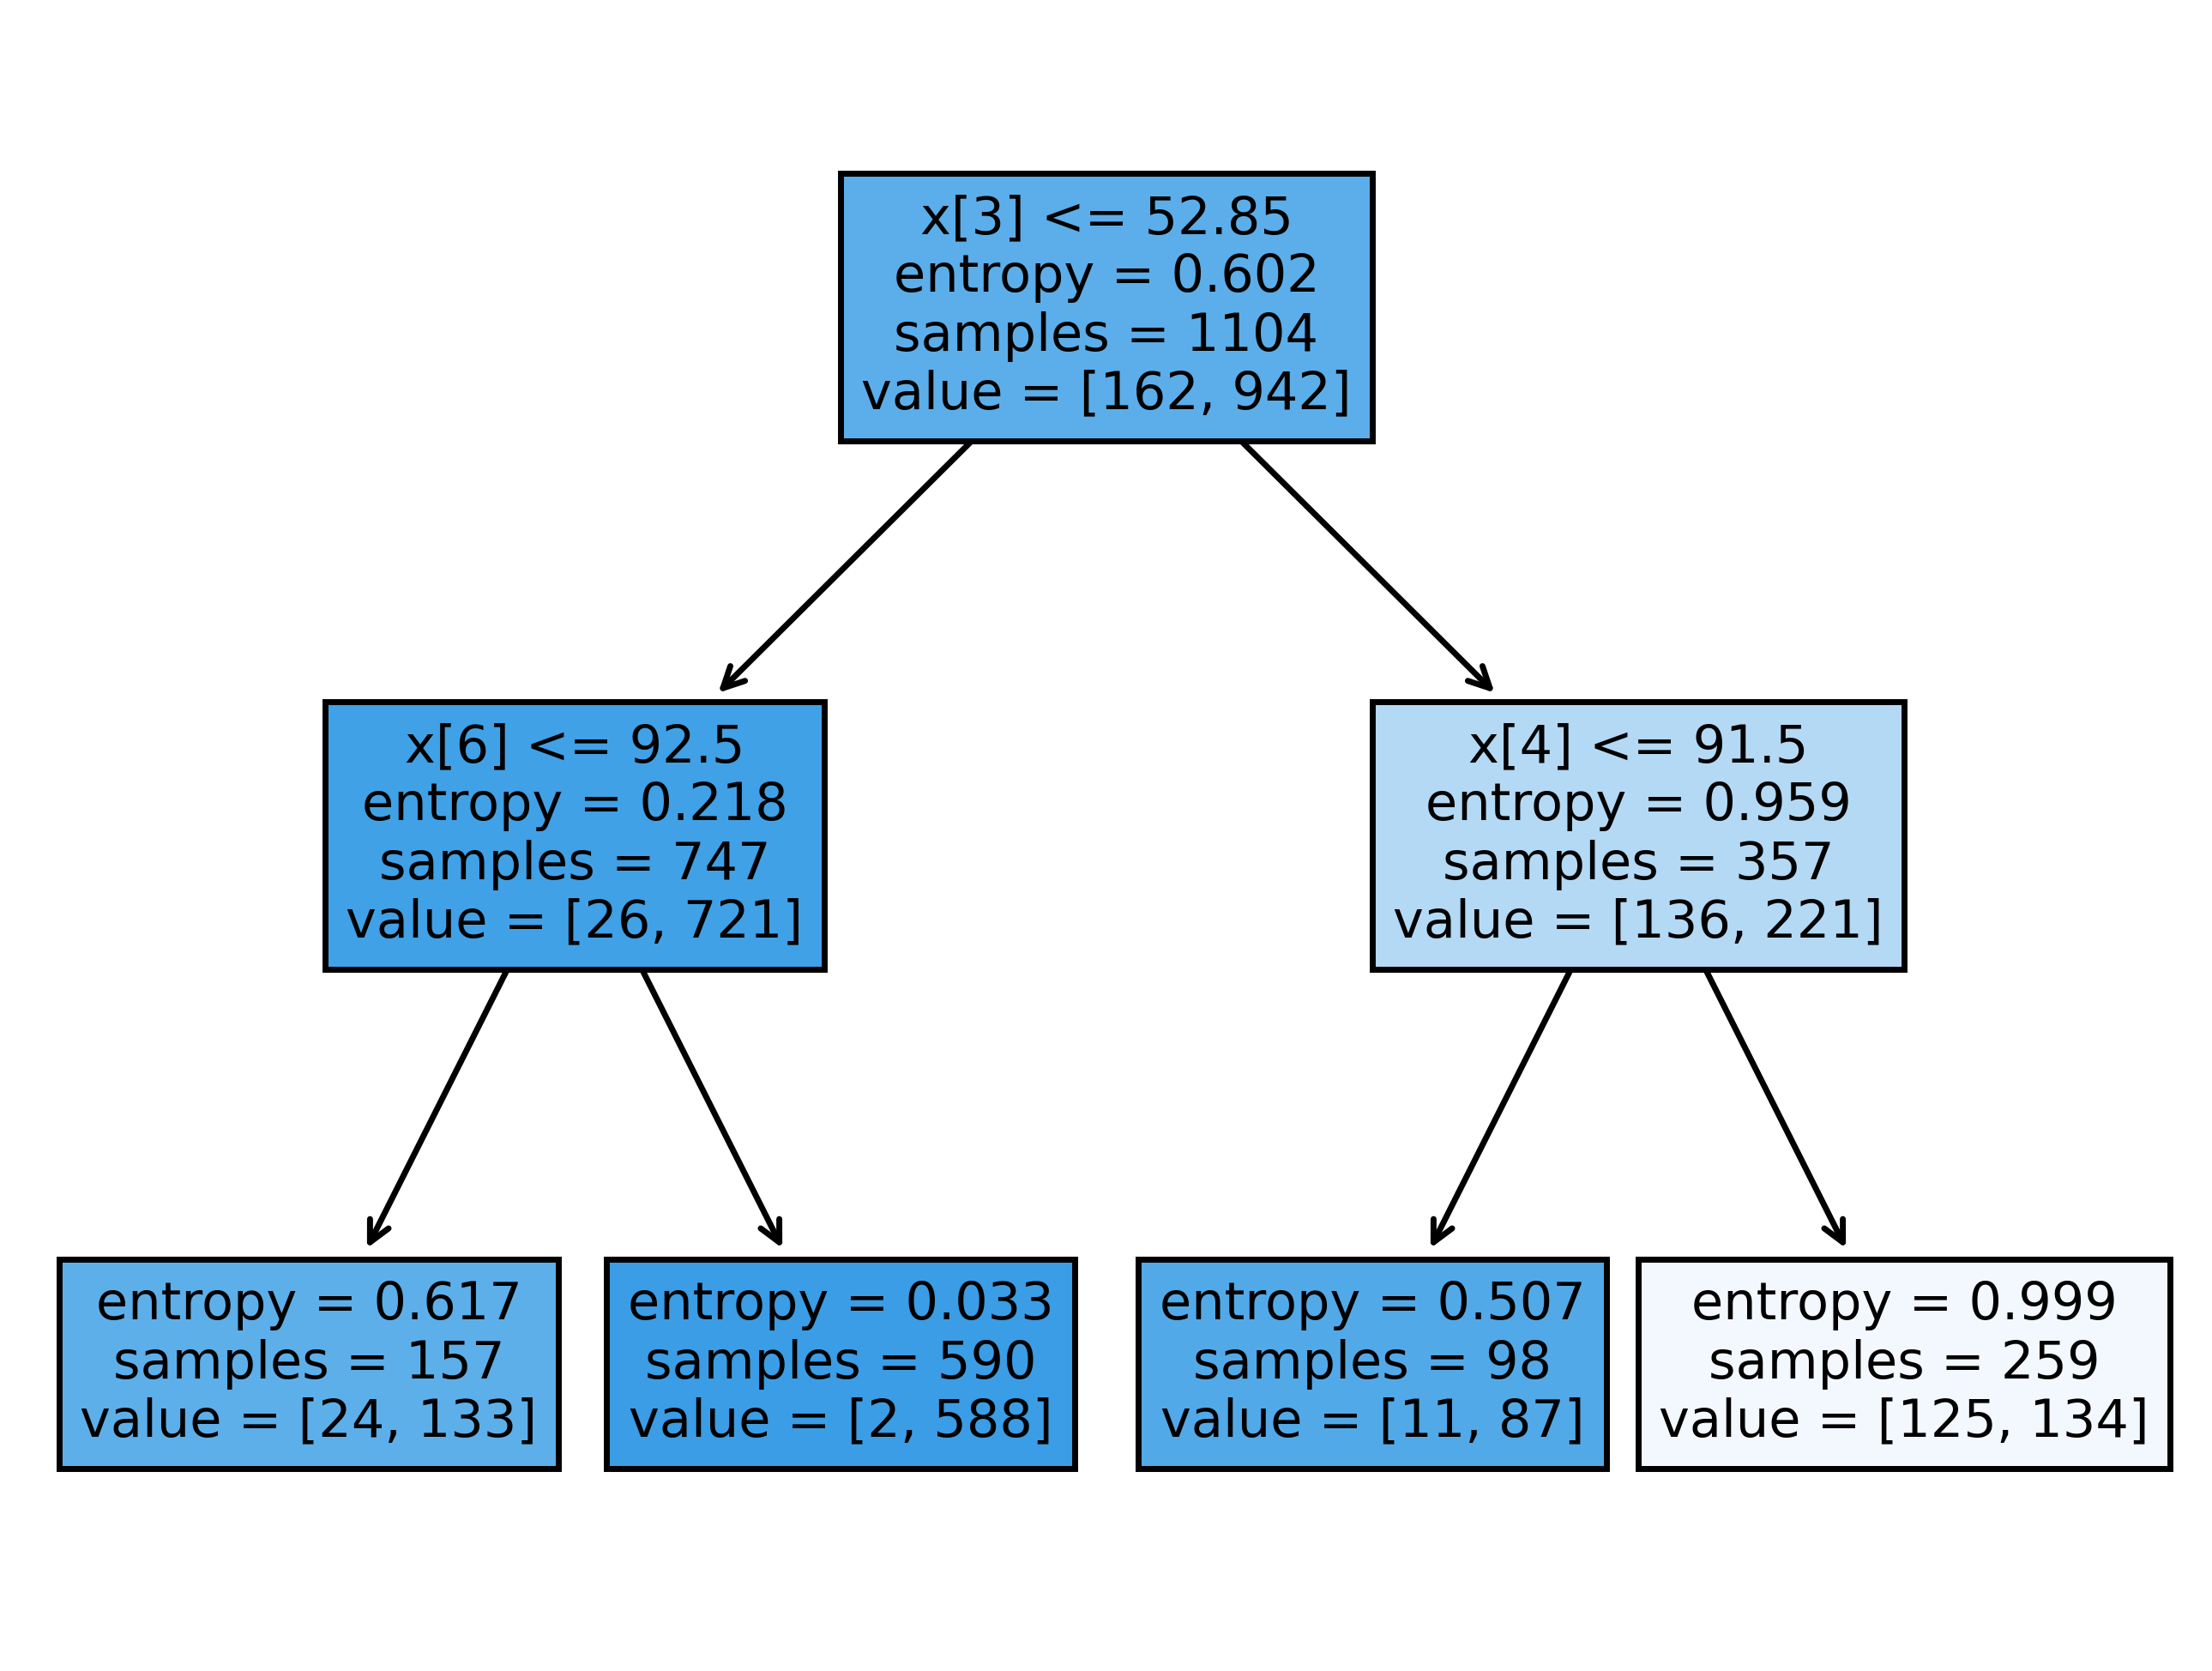

In [27]:
#copy n paste from notes
train = []
test = []
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth =2)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
y_predict = clf.predict(X_test)
plt.figure(dpi=500)
tree.plot_tree(clf,filled=True)
print(tree.export_text(clf))

#printed out all the info to see which one is the best
for i in range (2,21):
   clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
   clf.fit(X_train, y_train).max_depth
   y_predict_train1 = clf.predict(X_train)
   y_predict_test1 = clf.predict(X_test)
   print("train score ", i , ": ", accuracy_score(y_train,y_predict_train1))
   y_predict = clf.predict(X_test)
   #pritning confusion matrix
   print("test score", i, ": ", accuracy_score(y_test,y_predict_test1))
   print(confusion_matrix(y_test, y_predict))
   train.append([X_test, y_train, y_predict_train1])
   test.append([X_train, y_test, y_predict_test1])
   
   # jst show depth 2 and print acc score fo everything else

### 2.5
For the best performing tree in Question 2 (in terms of testing results), show the confusion matrices that are produced for the training set and testing set.

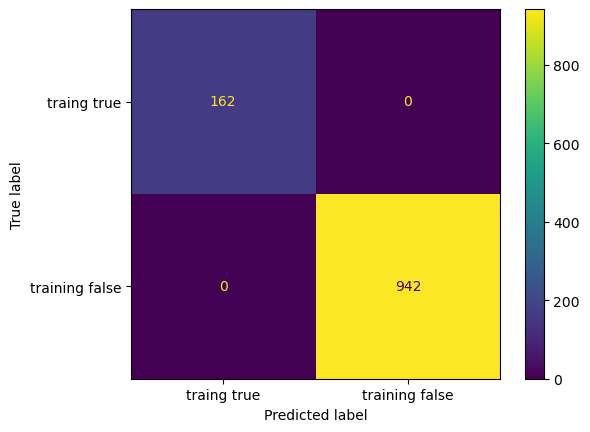

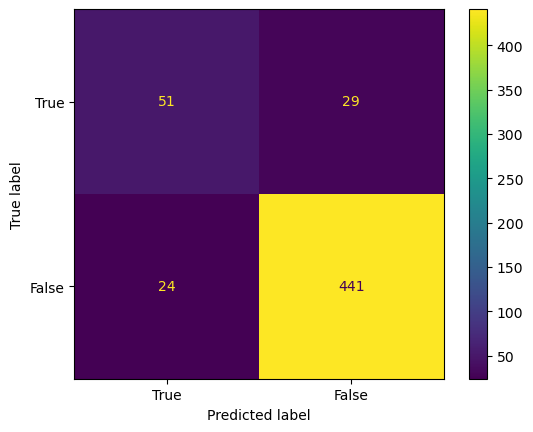

In [30]:
#confusion matric
disp1 = ConfusionMatrixDisplay(confusion_matrix(train[17][1], train[17][2]), display_labels=["traing true", "training false"])
disp1.plot()
disp = ConfusionMatrixDisplay(confusion_matrix(test[17][1],test[17][2]), display_labels=["True", "False"])
disp.plot()

### 2.6
Create two additional decision trees, where min samples leaf set
is set to 10 and min samples split set to 2 and a second where min samples leaf set is set
to 10 and min samples split set to 30. Calculate the training and testing scores for each.
Which of these performs better? Provide a short explanation (2-3 sentences) for why one
performs better than the other

tree 1
train score: 0.9384057971014492
test score: 0.8807339449541285

tree 2
train score: 0.9329710144927537
test scpore: 0.8770642201834863


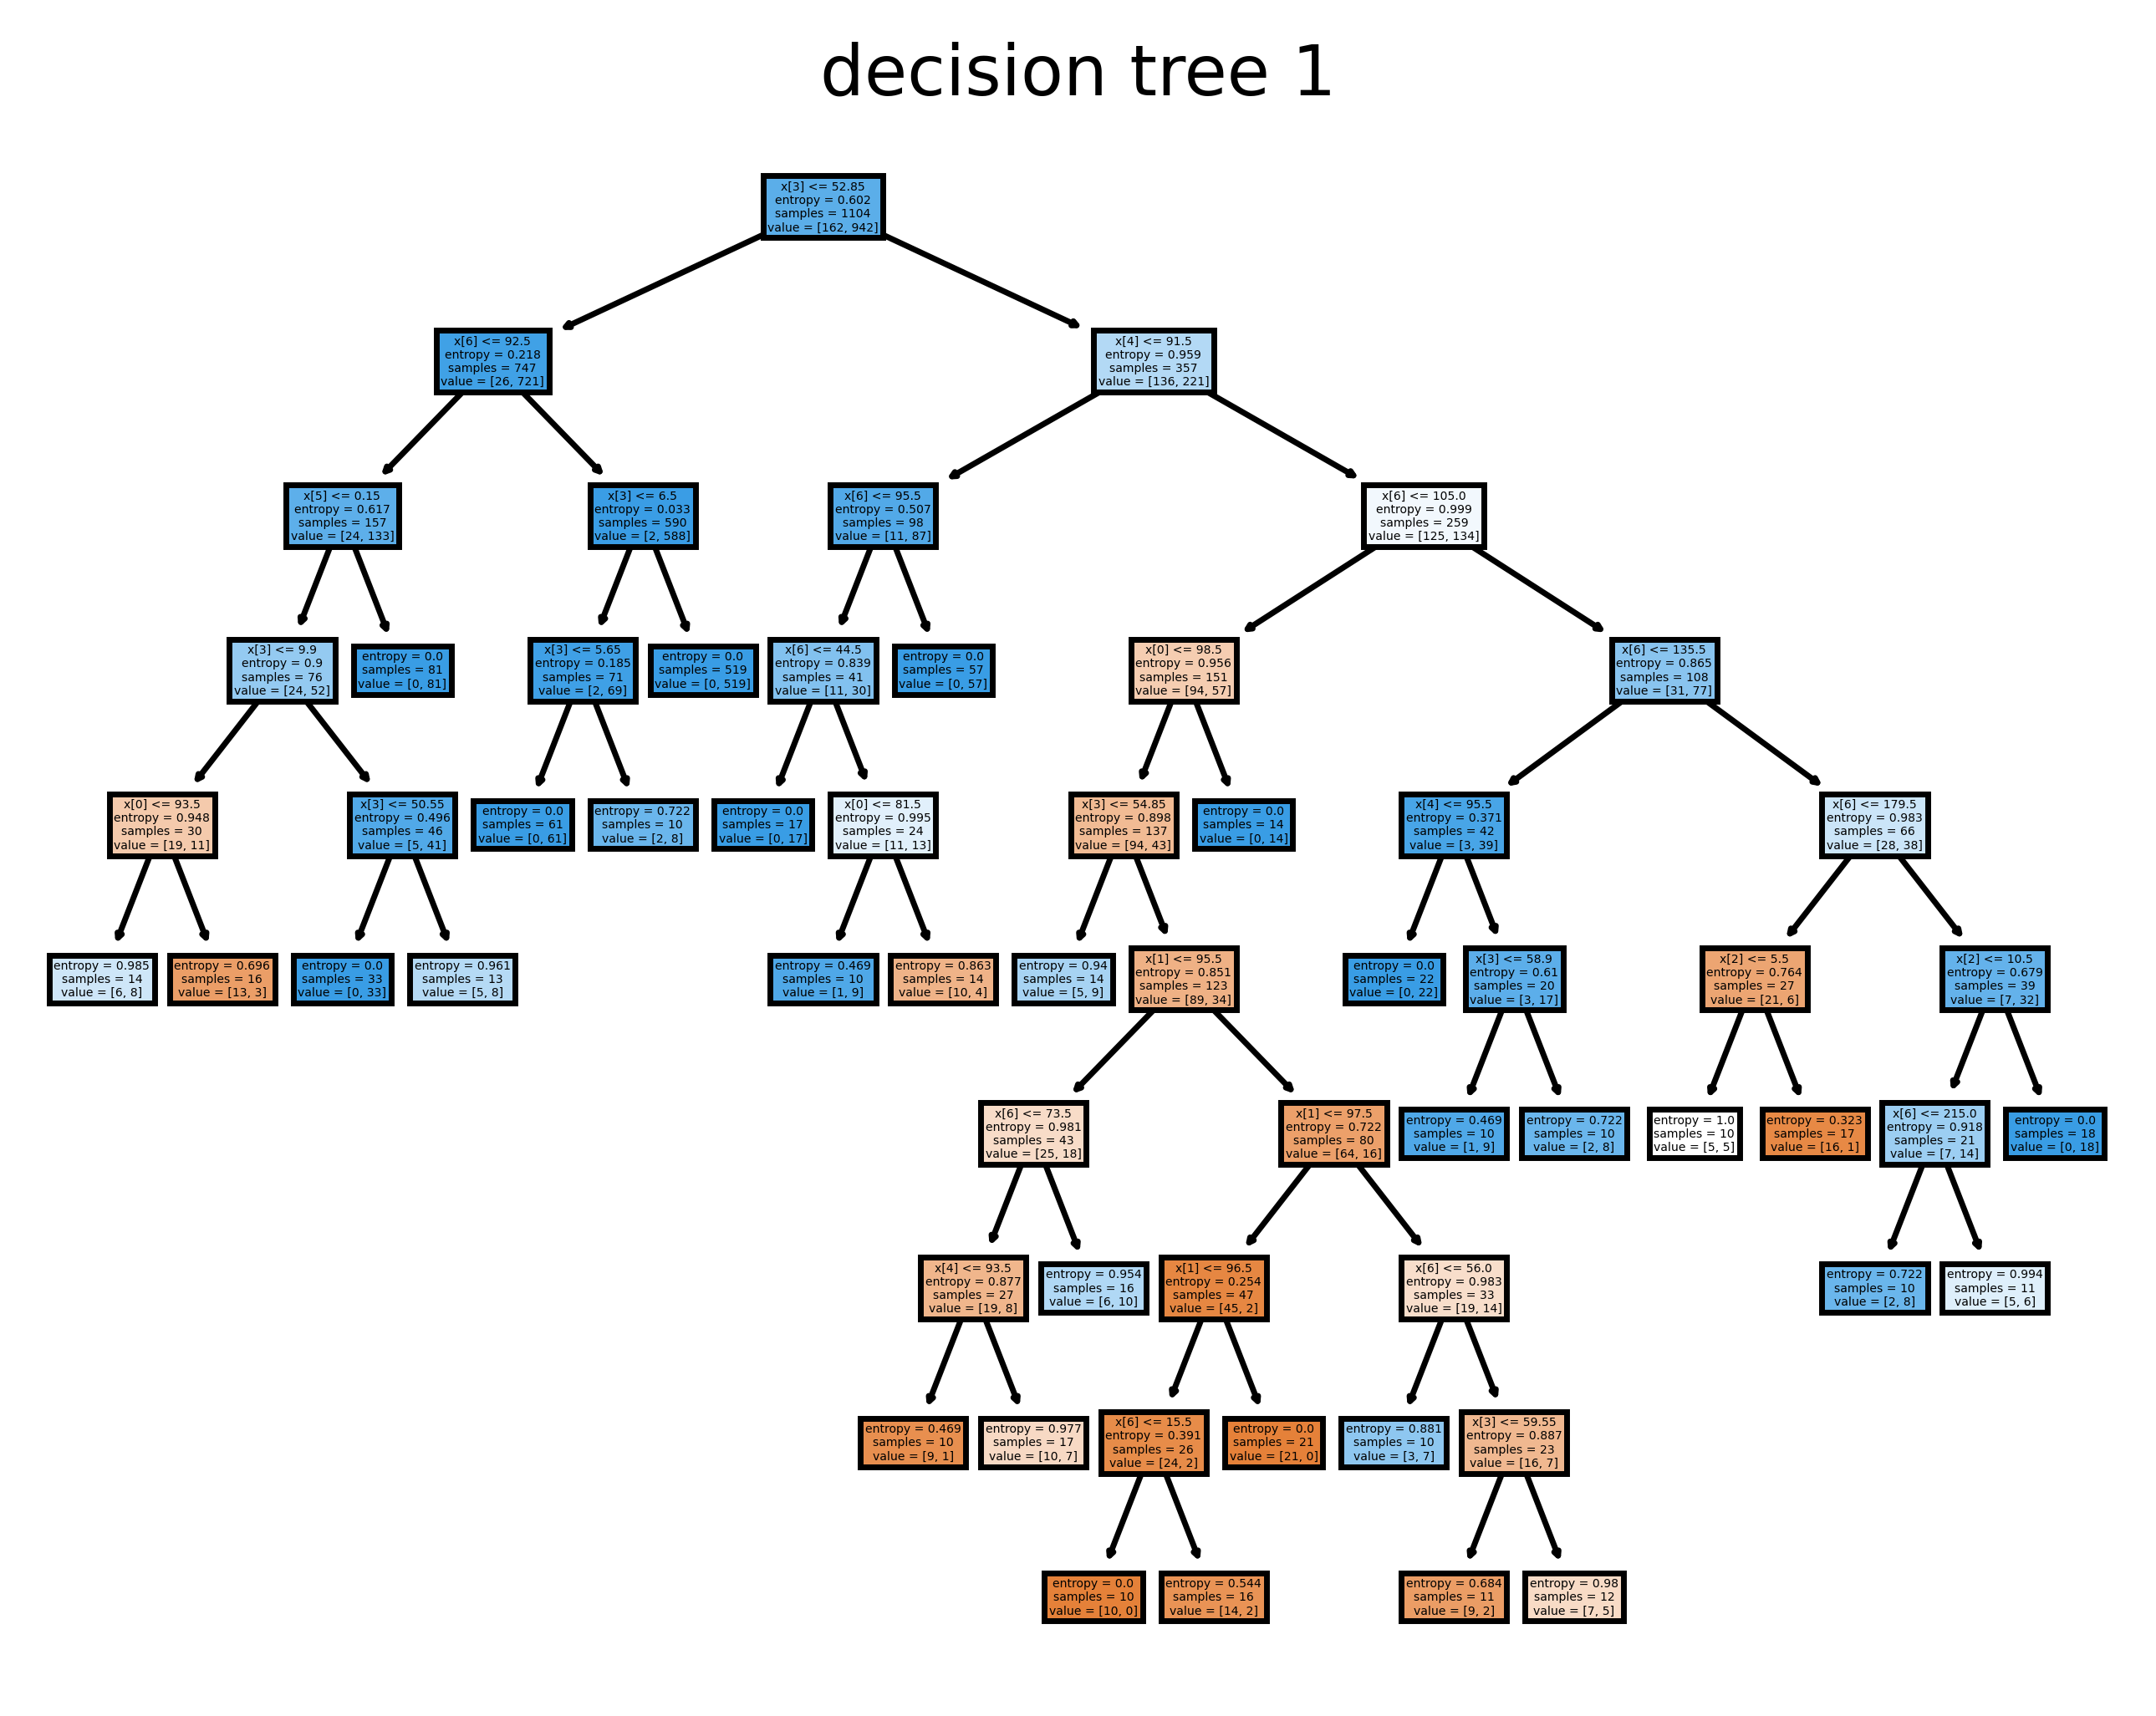

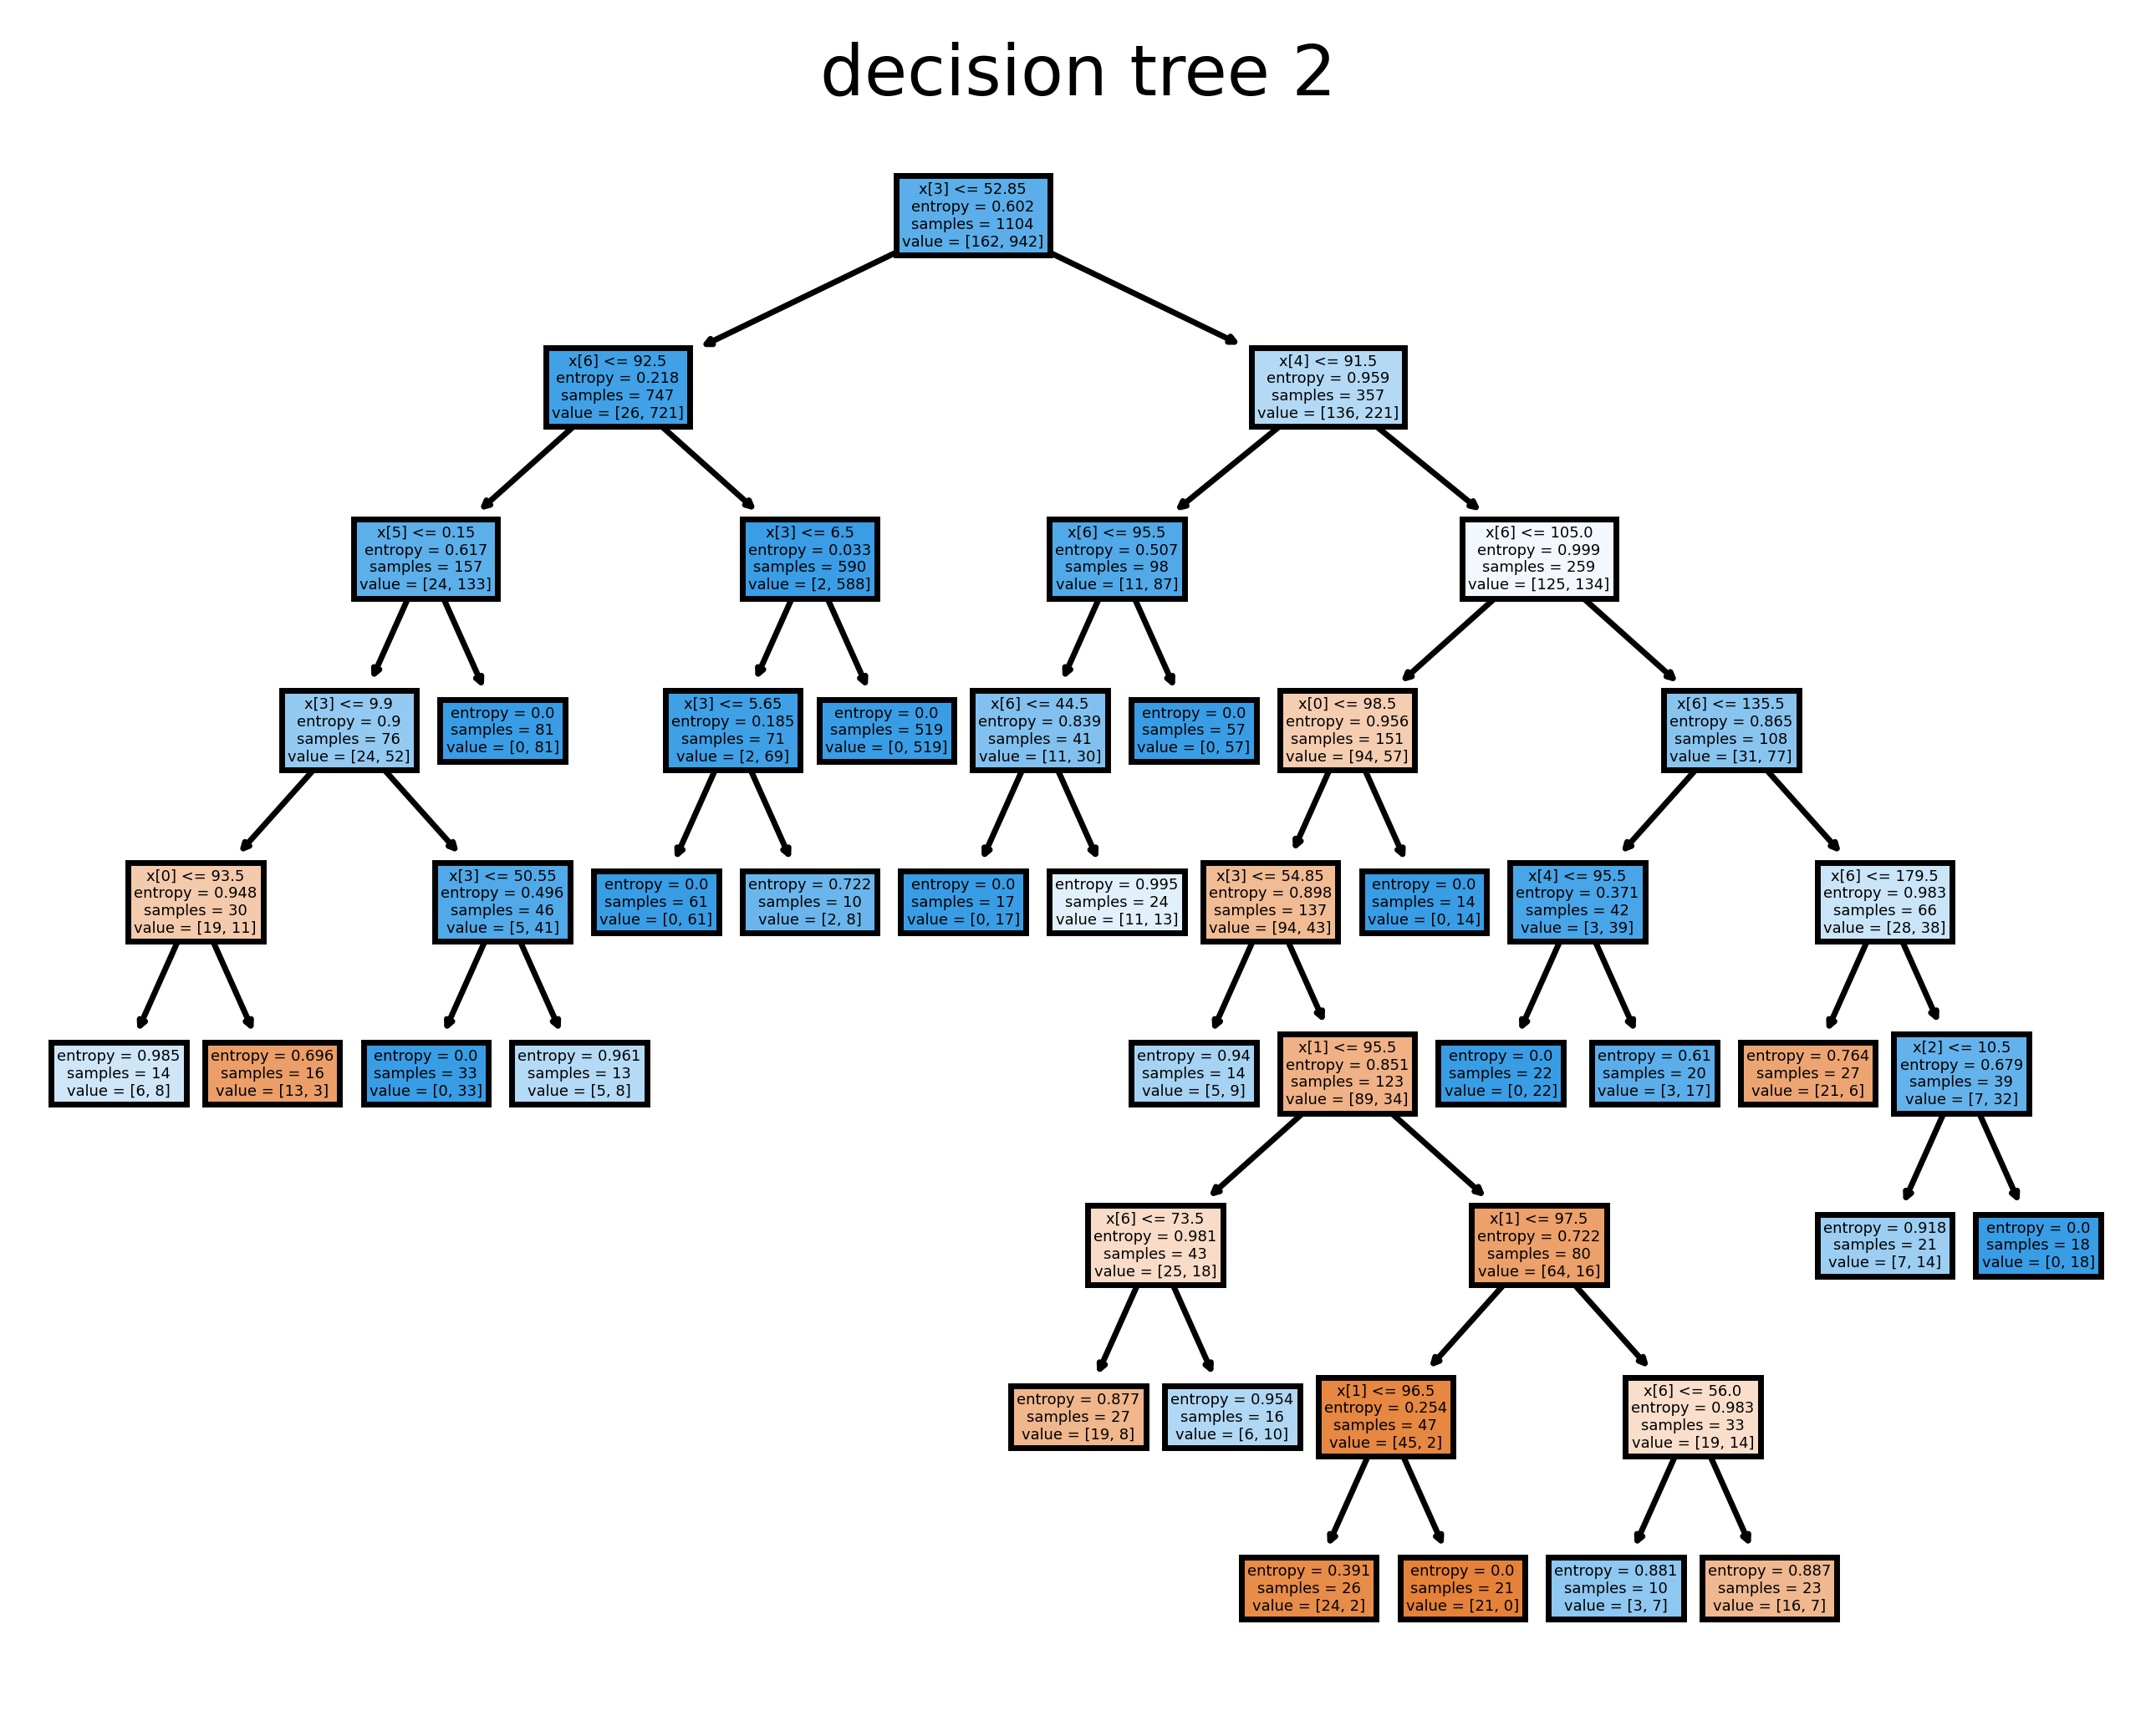

|--- feature_3 <= 52.85
|   |--- feature_6 <= 92.50
|   |   |--- feature_5 <= 0.15
|   |   |   |--- feature_3 <= 9.90
|   |   |   |   |--- feature_0 <= 93.50
|   |   |   |   |   |--- class: Developing
|   |   |   |   |--- feature_0 >  93.50
|   |   |   |   |   |--- class: Developed
|   |   |   |--- feature_3 >  9.90
|   |   |   |   |--- feature_3 <= 50.55
|   |   |   |   |   |--- class: Developing
|   |   |   |   |--- feature_3 >  50.55
|   |   |   |   |   |--- class: Developing
|   |   |--- feature_5 >  0.15
|   |   |   |--- class: Developing
|   |--- feature_6 >  92.50
|   |   |--- feature_3 <= 6.50
|   |   |   |--- feature_3 <= 5.65
|   |   |   |   |--- class: Developing
|   |   |   |--- feature_3 >  5.65
|   |   |   |   |--- class: Developing
|   |   |--- feature_3 >  6.50
|   |   |   |--- class: Developing
|--- feature_3 >  52.85
|   |--- feature_4 <= 91.50
|   |   |--- feature_6 <= 95.50
|   |   |   |--- feature_6 <= 44.50
|   |   |   |   |--- class: Developing
|   |   |   |--- f

In [ ]:
# First Decision Tree work , mostly copy n paste from notes
print("tree 1")
clf1 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10, min_samples_split=2)
clf1.fit(X_train, y_train)
y_predict_train1 = clf1.predict(X_train)
y_predict_test1 = clf1.predict(X_test)
print("train score:", accuracy_score(y_train, y_predict_train1))
print("test score:", accuracy_score(y_test, y_predict_test1))

# Second Decision tree work
print("\ntree 2")
clf2 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10, min_samples_split=30)
clf2.fit(X_train, y_train)
y_predict_train2 = clf2.predict(X_train)
y_predict_test2 = clf2.predict(X_test)
print("train score:", accuracy_score(y_train, y_predict_train2))
print("test scpore:", accuracy_score(y_test, y_predict_test2))


plt.figure(dpi=500)
tree.plot_tree(clf1, filled=True)
plt.title("decision tree 1")
plt.show()
plt.figure(dpi=500)
tree.plot_tree(clf2, filled=True)
plt.title("decision tree 2")
plt.show()
print(tree.export_text(clf1))
print(tree.export_text(clf2))
